# Explore Kestrel Segmentations

To install PyAudioAnalysis
```python
pip install pyAudioAnalysis
```

Or developer version

```python
git clone https://github.com/tyiannak/pyAudioAnalysis.git
cd pyAudioAnalysis
pip install -r ./requirements.txt
pip install -e .
cd ..
```

In [1]:
import matplotlib.pyplot as plt
import sound_segmentation
PSeg = sound_segmentation 
import os
import pyAudioAnalysis
import numpy as np
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

<ipython-input-2-289f902d4899>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


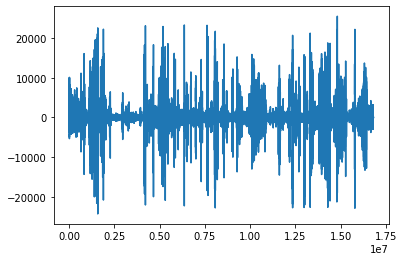

In [2]:
path = os.path.join(os.getcwd(), "../../", "inputs/mp3/mauritius_kestrel.mp3")

(fs,num_a,sound,_) = PSeg.load_data(path)
fig = plt.figure()
plt.plot(num_a)
fig.show()



In [3]:
#?aS.silence_removal

sound = np.array(sound[0:1000].T)

<ipython-input-3-6c57278f39a4>:3: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  sound = np.array(sound[0:1000])


In [ ]:
segments = aS.silence_removal(sound, fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.1, plot = True)


In [4]:



#path = os.path.join(os.getcwd(), "../mp3", "XC155388-Pink_Pigeon_(song,_Mauritius,_Black_River_Gorge,_nov2012,_2).MP3")

#[Fs, x] = aIO.read_audio_file(path)



In [5]:

segs_th=[]
for seg in segments:
    onset = int(seg[0]*fs)
    offset = int(seg[1]*fs)
    wave = num_a[onset:offset]
    segs_th.extend(wave)


ERROR! Session/line number was not unique in database. History logging moved to new session 399


NameError: name 'segments' is not defined

In [ ]:
fig = plt.figure()
plt.plot(segs_th,label="hard_threshold")

plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(segs_th,color='pink',label="hard_threshold")
plt.plot(all_segs,color='grey',label="raf_ying_onset_offset")
plt.plot(num_a,color='blue',label="original Pink Pigeon")
plt.legend()
plt.show()